In [293]:
                                         ##  Import All Important Libraries and Data  

In [294]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  
from numpy import nan


dataset_train=pd.read_csv("train_2.txt")
dataset_test=pd.read_csv("test_2.txt")
dataset_test1=pd.read_csv("test_2.txt")

In [295]:
# Columns names 
print (dataset_train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [296]:
                                                    ## Data Cleaning

In [297]:
# Filling NA values in the system
dataset_train.isnull().sum()
dataset_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [298]:
#Filling NA values with mode,mean value of that column
dataset_train['Outlet_Size']=dataset_train['Outlet_Size'].fillna(dataset_train['Outlet_Size'].mode()[0])
dataset_train['Item_Weight']=dataset_train['Item_Weight'].fillna(dataset_train['Item_Weight'].mean())

dataset_test['Outlet_Size']=dataset_test['Outlet_Size'].fillna(dataset_test['Outlet_Size'].mode()[0])
dataset_test['Item_Weight']=dataset_test['Item_Weight'].fillna(dataset_test['Item_Weight'].mean())

In [299]:
                                                    ##FEATURE ENGINEERING STARTED

In [300]:
                                                          ##  ANALYSIS

In [301]:
# Checking Fat Content                                        
dataset_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [302]:
# as seen into the output LF,low fat and Low Fat are same ..... reg,regular are also 
# Handle Item Fat Content column values
dataset_train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat',inplace=True)
dataset_train['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

dataset_test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat',inplace=True)
dataset_test['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

In [303]:
# Create bins for item visibility 
dataset_train['Item_Visibility_bins'] = pd.cut(dataset_train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])
dataset_test['Item_Visibility_bins'] = pd.cut(dataset_test['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [304]:
# Fill NA valuesof item visibilty bins
dataset_train['Item_Visibility_bins']=dataset_train['Item_Visibility_bins'].replace(nan,'Low_Viz')
dataset_test['Item_Visibility_bins']=dataset_test['Item_Visibility_bins'].replace(nan,'Low_Viz')

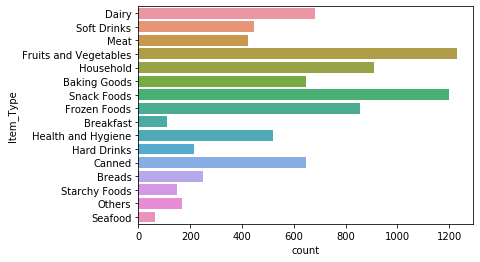

In [305]:
#Item Type checking
sns.countplot(y="Item_Type", data=dataset_train)


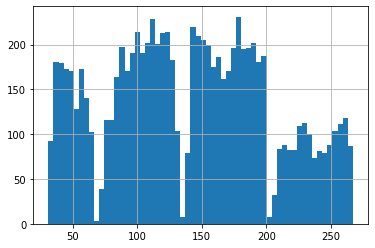

In [306]:
#Item MRP checking
dataset_train.Item_MRP.hist(bins=60)

In [307]:

# Not able to improve the accuracy with below categories
'''
# Create 4 MRP Categories  (Handling for if else condition with one function)
x1=68
x2=135
x3=200
def price_cat(x):
    if x <= x1:
        return 0
    elif (x > x1) & (x <= x2):
        return 1
    elif (x > x2) & (x <= x3):
        return 2
    else:
        return 3

dataset_train['Item_MRP_Category'] = dataset_train['Item_MRP']
dataset_train['Item_MRP_Category'] = dataset_train['Item_MRP_Category'].apply(price_cat)
dataset_train['Item_MRP_Category'].value_counts()

dataset_test['Item_MRP_Category'] = dataset_test['Item_MRP']
dataset_test['Item_MRP_Category'] = dataset_test['Item_MRP_Category'].apply(price_cat)
dataset_test['Item_MRP_Category'].value_counts()

dataset_train=dataset_train.drop(['Item_MRP'],axis=1)
dataset_test=dataset_test.drop(['Item_MRP'],axis=1)

'''

"\n# Create 4 MRP Categories  (Handling for if else condition with one function)\nx1=68\nx2=135\nx3=200\ndef price_cat(x):\n    if x <= x1:\n        return 0\n    elif (x > x1) & (x <= x2):\n        return 1\n    elif (x > x2) & (x <= x3):\n        return 2\n    else:\n        return 3\n\ndataset_train['Item_MRP_Category'] = dataset_train['Item_MRP']\ndataset_train['Item_MRP_Category'] = dataset_train['Item_MRP_Category'].apply(price_cat)\ndataset_train['Item_MRP_Category'].value_counts()\n\ndataset_test['Item_MRP_Category'] = dataset_test['Item_MRP']\ndataset_test['Item_MRP_Category'] = dataset_test['Item_MRP_Category'].apply(price_cat)\ndataset_test['Item_MRP_Category'].value_counts()\n\ndataset_train=dataset_train.drop(['Item_MRP'],axis=1)\ndataset_test=dataset_test.drop(['Item_MRP'],axis=1)\n\n"

In [308]:

#Value count of different columns Outlet establishment year,outlet size,outlet location type,outlet type
dataset_train.Outlet_Establishment_Year.value_counts()
dataset_train.Outlet_Size.value_counts()
dataset_train.Outlet_Location_Type.value_counts()
dataset_train.Outlet_Type.value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [309]:

# Below new created variables was not improving the accuracy
'''
# creating new variable Item Number Sales
dataset_train['Item_Number_Sales'] = dataset_train['Item_Outlet_Sales']/dataset_train['Item_MRP']

# plotting plot between Item MRP, Item number sales and outlet type
sns.pairplot(data=dataset_train, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type',size =10)

# plotting plot between Item Visibility, Item number sales and outlet type
sns.pairplot(data=dataset_train, x_vars='Item_Visibility', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)
'''


"\n# creating new variable Item Number Sales\ndataset_train['Item_Number_Sales'] = dataset_train['Item_Outlet_Sales']/dataset_train['Item_MRP']\n\n# plotting plot between Item MRP, Item number sales and outlet type\nsns.pairplot(data=dataset_train, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type',size =10)\n\n# plotting plot between Item Visibility, Item number sales and outlet type\nsns.pairplot(data=dataset_train, x_vars='Item_Visibility', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)\n"

In [310]:
                                                     ## Label Encoding

In [311]:
#choosing the Fat content, item vizibility bins, outlet size, loc type and type for LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset_train['Item_Fat_Content'] = le.fit_transform(dataset_train['Item_Fat_Content'])
dataset_train['Item_Visibility_bins'] = le.fit_transform(dataset_train['Item_Visibility_bins'])
dataset_train['Outlet_Size'] = le.fit_transform(dataset_train['Outlet_Size'])
dataset_train['Outlet_Location_Type'] = le.fit_transform(dataset_train['Outlet_Location_Type'])
dataset_train['Outlet_Type'] = le.fit_transform(dataset_train['Outlet_Type'])

dataset_test['Item_Fat_Content'] = le.fit_transform(dataset_test['Item_Fat_Content'])
dataset_test['Item_Visibility_bins'] = le.fit_transform(dataset_test['Item_Visibility_bins'])
dataset_test['Outlet_Size'] = le.fit_transform(dataset_test['Outlet_Size'])
dataset_test['Outlet_Location_Type'] = le.fit_transform(dataset_test['Outlet_Location_Type'])
dataset_test['Outlet_Type'] = le.fit_transform(dataset_test['Outlet_Type'])


In [312]:
                                                      ## One Hot Encoding

In [313]:
# Create dummy variables for the columns for single columns and append it to the data
dataset_train = pd.concat([dataset_train, pd.get_dummies(dataset_train['Outlet_Type'], prefix='Outlet_Type')], axis=1)
dataset_test = pd.concat([dataset_test, pd.get_dummies(dataset_test['Outlet_Type'], prefix='Outlet_Type')], axis=1)

#dataset_train = pd.concat([dataset_train, pd.get_dummies(dataset_train['Sex'], prefix='sex_')], axis=1)

dataset_train = pd.concat([dataset_train, pd.get_dummies(dataset_train['Outlet_Location_Type'], prefix='Outlet_Location_Type')], axis=1)
dataset_test = pd.concat([dataset_test, pd.get_dummies(dataset_test['Outlet_Location_Type'], prefix='Outlet_Location_Type')], axis=1)

In [314]:
#dropping repetitive columns
dataset_train=dataset_train.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1) 
dataset_test=dataset_test.drop(['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1) 

In [315]:
                                                 ## Preparing final data

In [316]:
# Preparing x and y 
y=dataset_train.Item_Outlet_Sales 
x=dataset_train.drop(['Item_Outlet_Sales'],axis=1)

In [317]:
                                                ## SCALING 

In [318]:
#splitting the data into Training and Testing Data
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3,random_state=0)

In [319]:
                                           ## MACHINE LEARNING (K FOLD)
scoring_mech= 'neg_mean_squared_error'
cross_val = 10 

In [320]:
# 1. Linear Regression with K fold validation
            
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
clf = linear_model.LinearRegression()
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_linreg_kfold=abs(scores.mean())
print (np.sqrt(score_linreg_kfold))

1130.6361747978087


In [173]:
# 2. Linear Regression LASSO with K fold validation

from sklearn import linear_model            
from sklearn.model_selection import cross_val_score
clf = linear_model.Lasso()
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_lasso_kfold=abs(scores.mean())
print (np.sqrt(score_lasso_kfold))

1130.3360281108498


In [174]:
# 3. Linear Regression RIDGE with K fold validation

from sklearn import linear_model            
from sklearn.model_selection import cross_val_score
clf = linear_model.Ridge()
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_ridge_kfold=abs(scores.mean())
print (np.sqrt(score_ridge_kfold))

1130.3643398754052


In [175]:
# 4. Support Vector Machine - LINEAR with K fold validation

from sklearn.svm import SVR            
from sklearn.model_selection import cross_val_score
clf = SVR(kernel='linear')
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_svr_lin_kfold=abs(scores.mean())
print (np.sqrt(score_svr_lin_kfold))

1166.5107828385708


In [63]:
# 5. Support Vector Machine - GAUSSIAN RBF with K fold validation

from sklearn.svm import SVR            
from sklearn.model_selection import cross_val_score
clf = SVR(kernel='rbf')
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_svr_rbf_kfold=abs(scores.mean())
print (np.sqrt(score_svr_rbf_kfold))

C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\svm\

1745.0898307739906


In [176]:
# 6. Decision Tree with K fold validation

from sklearn.tree import DecisionTreeRegressor            
from sklearn.model_selection import cross_val_score
clf = DecisionTreeRegressor()
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_dectree_kfold=abs(scores.mean())
print (np.sqrt(score_dectree_kfold))

1522.5326255840375


In [177]:
# 7. Random Forest with K fold validation
            
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
clf = RandomForestRegressor(random_state=0)
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_rf_kfold=abs(scores.mean())
print (np.sqrt(score_rf_kfold))

C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\skl

1182.8493977194594


In [178]:
# 8. ADA Boost with K fold validation

from sklearn.ensemble import AdaBoostRegressor            
from sklearn.model_selection import cross_val_score
clf = AdaBoostRegressor()
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_ada_kfold=abs(scores.mean())
print (np.sqrt(score_ada_kfold))

1207.782855506104


In [321]:
# 9. XG Boost with K fold validation

from xgboost.sklearn import XGBRegressor           
from sklearn.model_selection import cross_val_score
clf = XGBRegressor()
scores = cross_val_score(clf, x, y,scoring=scoring_mech, cv=cross_val)  
score_xgb_kfold=abs(scores.mean())
print (np.sqrt(score_xgb_kfold))        

C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:43:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1082.9087632894925


In [322]:
                                                 ##  MACHINE LEARNING (GRID SEARCH)
scoring_mech= 'neg_mean_squared_error'
cross_validation_value= 10

In [323]:
# 1. Grid Search with Linear Regression Linear Search
from sklearn import linear_model            
from sklearn.model_selection import GridSearchCV
parameters = {}
regressor_linreg = linear_model.LinearRegression()
grid_search_linreg = GridSearchCV(estimator = regressor_linreg,
                           param_grid = parameters,
                           scoring =scoring_mech,
                           cv = cross_validation_value)
grid_search_linreg = grid_search_linreg.fit(x, y)
score_linreg_gridsearch= abs(grid_search_linreg.best_score_)
bestparam_linreg_grid = grid_search_linreg.best_params_
print (np.sqrt(score_linreg_gridsearch))
print (bestparam_linreg_grid)

1130.6404543393996
{}


In [183]:
# 2. Grid Search with Linear Regression LASSO
from sklearn import linear_model            
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [1],   #eps, positive float, (.001,1000)
               'copy_X' : [True], #same
              'fit_intercept':[True], # Boolean, default:True
              'max_iter':[1000],#Iteration, (1,1000)
              'normalize':[False], # Boolean, default:False
              'positive':[False],#same
              'precompute':[False], # (True,False,auto (best))
              'random_state':[None], #same
              'selection':['cyclic'],#same
              'tol':[0.001] # positive float ,(0 1), 
             }]
regressor_lasso = linear_model.Lasso()
grid_search_lasso = GridSearchCV(estimator = regressor_lasso,
                           param_grid = parameters,
                           scoring = scoring_mech,
                           cv = cross_validation_value)
grid_search_lasso = grid_search_lasso.fit(x, y)
score_lasso_gridsearch= abs(grid_search_lasso.best_score_)
bestparam_lasso_grid = grid_search_lasso.best_params_
print (np.sqrt(score_lasso_gridsearch))
print (bestparam_lasso_grid)


1130.340236078832
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.001}


In [184]:

# 3. Grid Search with Linear Regression RIDGE

from sklearn import linear_model            
from sklearn.model_selection import GridSearchCV
parameters = [{'alpha': [1], # positive float (.001,1000)
               'copy_X' : [True], # same
              'fit_intercept':[True], # Boolean, default:True
              'max_iter':[None], # int (1,1000)
              'normalize':[False],# Boolean, default:False
              'solver':['auto'], # solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}
              'tol':[0.001]
             }]
regressor_ridge = linear_model.Ridge()
grid_search_ridge = GridSearchCV(estimator = regressor_ridge,
                           param_grid = parameters,
                           scoring = scoring_mech,
                           cv = cross_validation_value
                           )
grid_search_ridge = grid_search_ridge.fit(x, y)
score_ridge_gridsearch= abs(grid_search_ridge.best_score_)
bestparam_ridge_grid = grid_search_ridge.best_params_
print (np.sqrt(score_ridge_gridsearch))
print (bestparam_ridge_grid)

1130.368479612207
{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'solver': 'auto', 'tol': 0.001}


In [87]:
# 4. Grid Search with DecisionTree
from sklearn.tree import DecisionTreeRegressor            
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ['mse'], # {'mse','mae','friedman_mse',}
               'max_depth': [None], # int, {None,or int value}
               'max_features': [None], # same
               'max_leaf_nodes': [None], # int, {None,or int value}
               'min_impurity_decrease': [0.0],# float ,default = .0001 
               'min_impurity_split': [None], # float ,default = 0
               'min_samples_leaf' : [1], # int ,default = 1
               'min_samples_split' : [2], # int ,default = 2
               'min_weight_fraction_leaf' : [0.0], # int ,default = 0
               'presort' : [False], # Boolean , default= False
               'splitter':['best'] #{'best','random'}
               }]
regressor_dectree = DecisionTreeRegressor(random_state=0)
grid_search_dectree = GridSearchCV(estimator = regressor_dectree,
                                   param_grid = parameters,
                                   scoring = scoring_mech,
                                   cv = cross_validation_value
                                   )
grid_search_dectree = grid_search_dectree.fit(x, y)
score_dectree_gridsearch= abs(grid_search_dectree.best_score_)
bestparam_dectree_grid = grid_search_dectree.best_params_
print (np.sqrt(score_dectree_gridsearch))
print (bestparam_dectree_grid)

1535.3751338163916
{'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'splitter': 'best'}


In [186]:
# 5. Grid Search with Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ['mse'], # {'mse','mae'}
               'max_depth': [None],# int, {None,or int value}
               'max_features': ['auto'], #same
               'max_leaf_nodes': [None],# int, {None,or int value}
               'min_impurity_decrease': [0], # float, default =0
               'min_impurity_split': [None], # float ,default = 0.0001
               'min_samples_leaf' : [1], # int ,default = 1
               'min_samples_split' : [2], # int ,default = 2
               'min_weight_fraction_leaf' : [0], # float ,default = 0
               'n_estimators': [100]  # no of trees, default = 10
               }]
regressor_rf = RandomForestRegressor(random_state = 0)
grid_search_rf = GridSearchCV(estimator = regressor_rf,
                           param_grid = parameters,
                           scoring = scoring_mech,
                           cv = cross_validation_value
                           )
grid_search_rf = grid_search_rf.fit(x, y)
score_rf_gridsearch= abs(grid_search_rf.best_score_)
bestparam_rf_grid = grid_search_rf.best_params_
print (np.sqrt(score_rf_gridsearch))
print (bestparam_rf_grid)

1141.6032459258088
{'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0, 'n_estimators': 100}


In [187]:
# 6. Grid Search with ADA BOOST
from sklearn.ensemble import AdaBoostRegressor   
from sklearn.model_selection import GridSearchCV

parameters = [{'base_estimator' : [None],              
              'learning_rate': [.1], # default =1 
              'loss': ['linear', 'square', 'exponential'],# {‘linear’, ‘square’, ‘exponential’}, default = linear
              'n_estimators': [60], # default = 50 
              }]
regressor_ada = AdaBoostRegressor(random_state = 0)
grid_search_ada = GridSearchCV(estimator = regressor_ada,
                           param_grid = parameters,
                           scoring = scoring_mech,
                           cv = cross_validation_value
                           )
grid_search_ada = grid_search_ada.fit(x, y)
score_ada_gridsearch= abs(grid_search_ada.best_score_)
bestparam_ada_grid = grid_search_ada.best_params_
print (np.sqrt(score_ada_gridsearch))
print (bestparam_ada_grid)

1113.7343552033485
{'base_estimator': None, 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 60}


In [324]:
# 7. Grid Search with XG BOOST
from xgboost.sklearn import XGBRegressor 
from sklearn.model_selection import GridSearchCV

parameters = [{'objective':['reg:linear'],
              'learning_rate': [0.1], #eta range()
              'max_depth': [3], # max_depth range(1,15)
              'min_child_weight': [1], # min_child_weight range(0,7)
              'subsample': [1], #subsample (.1,1)
              'colsample_bytree': [1], # colsample_bytree(0,1)
              'colsample_bylevel': [1], # colsample_bytree(0,1)
              'n_estimators': [51,55,60],# nrounds(1,5000)
              'reg_alpha':[493,795],
              'reg_lambda':[31],
              'min_split_loss':[0],
              'booster': ['gbtree','dart']
              }]          

regressor_xgb = XGBRegressor()
grid_search_xgb = GridSearchCV(estimator = regressor_xgb,
                           param_grid = parameters,
                           scoring = scoring_mech,
                           cv = cross_validation_value
                           )
grid_search_xgb = grid_search_xgb.fit(x, y)
score_xgb_gridsearch= abs(grid_search_xgb.best_score_)
bestparam_xgb_grid = grid_search_xgb.best_params_
print (np.sqrt(score_xgb_gridsearch))
print (bestparam_xgb_grid)

C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



[18:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Vijay Patil\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1078.6875119336648
{'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'min_split_loss': 0, 'n_estimators': 60, 'objective': 'reg:linear', 'reg_alpha': 493, 'reg_lambda': 31, 'subsample': 1}


In [325]:
# 8. Grid Search with SVR (Linear,Polynomial,Sigmoid, RBF Gaussian)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear','poly','sigmoid','rbf'], #{'linear','poly','sigmoid','rbf'}
              'coef0' : [0], # float, default = 0
              'tol' : [.001], #float, default = 0.001
         #     'degree':[], # used in poly ,ignored by other kernels
              'gamma': [0.0001, 0.001], # float,default= 'auto'
              'C': [0.1, 1], # float, default = 1
              'epsilon': [0.0001, 0.0005],# float default = 0.1    
        }
regressor_svr =SVR(kernel='linear')
grid_search_svr = GridSearchCV(estimator = regressor_svr,
                           param_grid = parameters,
                           scoring = scoring_mech,
                           cv = cross_validation_value
                           )
grid_search_svr = grid_search_svr.fit(x, y)
score_svr_gridsearch= abs(grid_search_svr.best_score_)
bestparam_svr_grid = grid_search_svr.best_params_
print (np.sqrt(score_svr_gridsearch))
print (bestparam_svr_grid)

1136.1945039427203
{'C': 1, 'coef0': 0, 'epsilon': 0.0001, 'gamma': 0.0001, 'kernel': 'poly', 'tol': 0.001}


In [286]:

# 9. Grid Search with LIGHT_GadientBoostingM

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
'boosting_type':['gbdt'],# {'gbdt','dart','rf','goss'}
'class_weight':[None], # same
'colsample_bytree' : [1],# float,default : 1
'importance_type':['split'], # same
'learning_rate':[0.1],# float ,default =.1
'max_depth':[-1], # int ,default = -1
'min_child_samples' : [20], # int , default = 20
'min_child_weight' : [0.001], # float, default =.0001
'min_split_gain' : [0],# float, default = 0
'n_estimators'  : [100], # int  , default = 100
'num_leaves' : [31],# int ,default= 31
'objective' : [None],
'random_state' : [None],# same
'reg_alpha' : [0.0],# float, default : 0
'reg_lambda' : [0.0],# float, default : 0
'silent' : [True],# same
'subsample' : [1],# float, default =1
'subsample_for_bin' : [200000],# int ,default = 200000
'subsample_freq' : [0] # same
        
        }
##parameters={}
regressor_lgbm = LGBMRegressor()
grid_search_lgbm = GridSearchCV(estimator = regressor_lgbm,
                           param_grid = parameters,
                           scoring = scoring_mech,
                           cv = cross_validation_value
                           )
grid_search_lgbm = grid_search_lgbm.fit(x, y)
accuracy_lgbm_grid = abs(grid_search_lgbm.best_score_)
bestparam_lgbm_grid = grid_search_lgbm.best_params_
print (np.sqrt(accuracy_lgbm_grid))
print (bestparam_lgbm_grid)

1105.5109202953684
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0, 'n_estimators': 100, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [209]:
'''
# 10. Grid Search with CATBoost             

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
parameters = {
              'loss_function':['RMSE'], #
              'iterations' :[50],
              'learning_rate': [0.3], # Float ,default : .03
              'l2_leaf_reg' :[3],    #Lambda, default : 3
             # 'bootstrap_type' : ['bayesian'],
             # 'bagging_temperature' : [1], # default  : 1,  (0,infinity) float
             # 'subsample':[.66],  # Float,
             'sampling_frequency': ['PerTree','PerTreeLevel'],
              'depth':[6], # int , default =6 , range(1,16)
              'min_data_in_leaf' : [1], # default : 1 
              'max_leaves' : [31], #int , default : 31 , range(1,64)  not more than 64 is recommended
             # 'scale_pos_weight' : [1],# Float, default : 1
            #  'boosting_type' ['Ordered'], # ['Ordered ','Plain']
           #   'early_stopping_rounds' : [False], # int , 

              }
regressor_catb = CatBoostRegressor(eval_metric='RMSE')
grid_search_catb = GridSearchCV(estimator = regressor_catb,
                           param_grid = parameters,
                           scoring=scoring_mech,
                           cv = cross_validation_value)
grid_search_catb = grid_search_catb.fit(x, y)
accuracy_catb_grid = abs(grid_search_catb.best_score_)
bestparam_catb_grid = grid_search_catb.best_params_

print (np.sqrt(accuracy_catb_grid))
print (bestparam_catb_grid)

'''

"\n# 10. Grid Search with CATBoost             \n\nfrom catboost import CatBoostRegressor\nfrom sklearn.model_selection import GridSearchCV\nparameters = {\n              'loss_function':['RMSE'], #\n              'iterations' :[50],\n              'learning_rate': [0.3], # Float ,default : .03\n              'l2_leaf_reg' :[3],    #Lambda, default : 3\n             # 'bootstrap_type' : ['bayesian'],\n             # 'bagging_temperature' : [1], # default  : 1,  (0,infinity) float\n             # 'subsample':[.66],  # Float,\n             'sampling_frequency': ['PerTree','PerTreeLevel'],\n              'depth':[6], # int , default =6 , range(1,16)\n              'min_data_in_leaf' : [1], # default : 1 \n              'max_leaves' : [31], #int , default : 31 , range(1,64)  not more than 64 is recommended\n             # 'scale_pos_weight' : [1],# Float, default : 1\n            #  'boosting_type' ['Ordered'], # ['Ordered ','Plain']\n           #   'early_stopping_rounds' : [False], # int

In [210]:
                                                   ##  MACHINE LEARNING (RANDOM SEARCH)      

In [211]:
# 1. Random Search with Linear Regression Linear Search
from sklearn import linear_model            
from sklearn.model_selection import RandomizedSearchCV
parameters = {}
regressor_linreg = linear_model.LinearRegression()
random_search_linreg = RandomizedSearchCV(estimator = regressor_linreg,
                           param_distributions = parameters,
                           scoring =scoring_mech,
                           cv = cross_validation_value
                           )
random_search_linreg = random_search_linreg.fit(x, y)
score_linreg_random= abs(random_search_linreg.best_score_)
bestparam_linreg_random = random_search_linreg.best_params_
print (np.sqrt(score_linreg_random))
print (bestparam_linreg_random)

1130.3763107352027
{}


C:\Users\Vijay Patil\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [212]:
                                                    ## FINAL SUBMISSION FILE

In [287]:
# create submission file
pred = grid_search_lgbm.predict(dataset_test)
submission = pd.DataFrame(data=[], columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
submission['Item_Identifier'] = dataset_test1['Item_Identifier']
submission['Outlet_Identifier'] = dataset_test1['Outlet_Identifier']
submission['Item_Outlet_Sales'] = pred
submission.to_csv('submission.csv', index=False)
